<a href="https://colab.research.google.com/github/danyella-carv/imoveis_SP/blob/main/Projeto_Im%C3%B3veis_SP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src= 'https://drive.google.com/uc?id=1Pj4uEceX3rQKy6ij4vH3C1ECCcdJFASi' width="600" height="400">

# Projeto Vendas de Imóveis na cidade de SP 


In [147]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [148]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.2f' % x)

fonte = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(fonte)

# Primeira visualização dos dados

In [149]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


> ### Bairros registrados

In [150]:
bairros = dados['Bairro'].unique()

In [151]:
pd.Series(bairros)

0          Planalto Paulista
1         Jardim dos Estados
2            Jardim Reimberg
3             Jardim Morumbi
4                      Mooca
               ...          
697         Parque São Jorge
698                Vila Reis
699       Parque das Árvores
700           Vila São Pedro
701    Jardim das Carmelitas
Length: 702, dtype: object

> ## Quantidade de registros por bairro

In [152]:
dados['Bairro'].value_counts()

Alto de Pinheiros     409
Jardim Guedala        403
Jardim Paulista       309
Brooklin Paulista     247
Jardim Europa         240
                     ... 
Jardim das Imbuias      1
Vila Represa            1
Vila Nancy              1
Sítio Represa           1
Vila Invernada          1
Name: Bairro, Length: 701, dtype: int64

> ### Mostrando num gráfico de barras os 10 primeiros bairros com mais imóveis no dataset

In [153]:
n_imoveis_bairro = dados['Bairro'].value_counts()

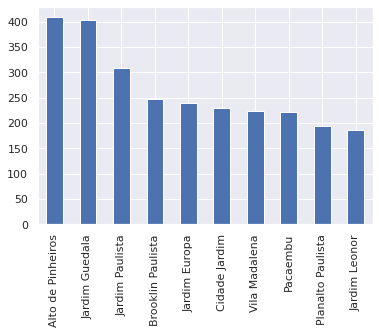

In [154]:
n_imoveis_bairro.head(10).plot.bar() 

> # Algumas estatísticas básicas

In [155]:
dados.describe()

,Metragem,Quartos,Banheiros,Vagas
count,10008.00,10008.00,10008.00,10008.00
mean,442.30,3.48,3.88,4.10
std,7515.38,1.06,1.99,2.82
min,10.00,1.00,1.00,1.00
25%,173.00,3.00,2.00,2.00
50%,290.00,3.00,4.00,4.00
75%,460.25,4.00,5.00,5.00
max,750000.00,16.00,40.00,50.00


> ## Buscando a metragem máxima

In [156]:
dados[dados.Metragem ==  dados['Metragem'].max()] 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
9845,Avenida George Saville Dodd,Jardim Guedala,São Paulo,750000,5,9,6,R$ 7.000.000


> ## Buscando os dados sem registro de Rua

In [157]:
sem_rua = dados[dados.Rua.isnull()] 
sem_rua 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
11,NaN,Jardim Luzitânia,São Paulo,436,4,3,3,R$ 15.000
31,NaN,Parque da Lapa,São Paulo,220,4,4,3,R$ 849.000
56,NaN,Chácara Santo Antônio (Zona Sul),São Paulo,190,2,2,2,R$ 1.100.000
57,NaN,Jardim Guedala,São Paulo,650,4,6,4,R$ 5.500.000
...,...,...,...,...,...,...,...,...
9963,NaN,Jardim Petrópolis,São Paulo,423,5,7,6,R$ 2.800.000
9989,NaN,Parque Alves de Lima,São Paulo,127,2,1,2,R$ 400.000
9991,NaN,Vila Formosa,São Paulo,145,3,2,3,R$ 750.000
9995,NaN,Jardim Leonor,São Paulo,1350,5,9,7,R$ 9.500.000


In [158]:
sem_rua['Bairro'].value_counts()

Jardim Guedala                      190
Alto de Pinheiros                   169
Jardim Paulista                     138
Jardim Europa                       128
Jardim Leonor                       118
                                   ... 
Jardim do Colégio (Zona Norte)        1
Alto da Boa Vista                     1
Jardim Aeroporto                      1
Conjunto Residencial Vista Verde      1
Jardim Santo Elias                    1
Name: Bairro, Length: 394, dtype: int64

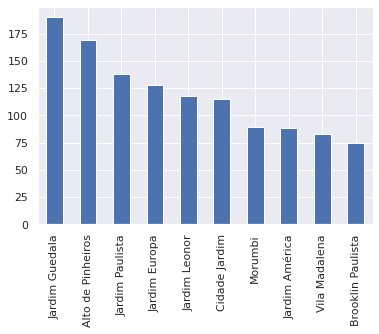

In [159]:
sem_rua['Bairro'].value_counts().head(10).plot.bar()

In [160]:
#newdata = dados.drop(dados[dados.Metragem ==  dados['Metragem'].max()])
dados.loc[9845,:]

Rua          Avenida George Saville Dodd
Bairro                    Jardim Guedala
Cidade                         São Paulo
Metragem                          750000
Quartos                                5
Banheiros                              9
Vagas                                  6
Valor                       R$ 7.000.000
Name: 9845, dtype: object

In [161]:
dados.Metragem.sort_values() 

9603        10
5009        20
5059        25
5652        25
8553        29
         ...  
4788      2850
7930      7126
6883     35677
6600     37000
9845    750000
Name: Metragem, Length: 10008, dtype: int64

> ## Retirando valores que se comportam como "outliers".

In [162]:
dados = dados.drop([9845, 6600, 6883], axis = 0) 
dados.Metragem.sort_values() 

9603      10
5009      20
5652      25
5059      25
8553      29
        ... 
7067    2500
7906    2505
7791    2505
4788    2850
7930    7126
Name: Metragem, Length: 10005, dtype: int64

> ## Número de Quartos X Metragem

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


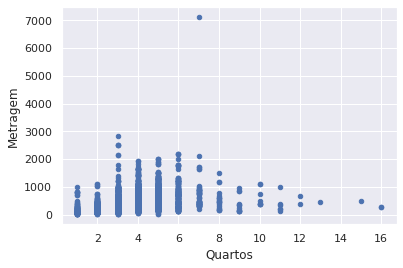

In [163]:
dados.plot.scatter(x="Quartos", y="Metragem")  

# **Trabalhando a variável Valor**

In [164]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6572 non-null   object
 1   Bairro     9993 non-null   object
 2   Cidade     10005 non-null  object
 3   Metragem   10005 non-null  int64 
 4   Quartos    10005 non-null  int64 
 5   Banheiros  10005 non-null  int64 
 6   Vagas      10005 non-null  int64 
 7   Valor      10005 non-null  object
dtypes: int64(4), object(4)
memory usage: 703.5+ KB


> ## Os valores estão em formato string

In [165]:
dados['Valor'][0] ## é uma string 

'R$ 7.000.000'

In [166]:
dados['Valor'][0].split() 

['R$', '7.000.000']

In [167]:
dados['Valor'].str.split(expand=True)  ## expande a série em um dataframe

,0,1,2
0,R$,7.000.000,None
1,R$,3.700.000,None
2,R$,380.000,None
3,R$,685.000,None
4,R$,540.000,None
...,...,...,...
10003,R$,665.000,None
10004,R$,2.300.000,None
10005,R$,1.050.000,None
10006,R$,2.200,/Mês


In [168]:
dados.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor'],
      dtype='object')

> ## Criando uma nova variável 'Valor_anuncio'

In [169]:
dados[['Moeda', 'Valor_anuncio', 'Tipo_anuncio']] = dados['Valor'].str.split(expand=True)
dados.head() ##em cima, colocou dentro de dois colchetes, pois está passando como parâmetro uma lista de novas colunas


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None


In [170]:
dados.info() #Valor_anuncio ainda é uma string. É necessário fazer a conversão. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10005 entries, 0 to 10007
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Rua            6572 non-null   object
 1   Bairro         9993 non-null   object
 2   Cidade         10005 non-null  object
 3   Metragem       10005 non-null  int64 
 4   Quartos        10005 non-null  int64 
 5   Banheiros      10005 non-null  int64 
 6   Vagas          10005 non-null  int64 
 7   Valor          10005 non-null  object
 8   Moeda          10005 non-null  object
 9   Valor_anuncio  10005 non-null  object
 10  Tipo_anuncio   852 non-null    object
dtypes: int64(4), object(7)
memory usage: 1.2+ MB


In [171]:
dados_vendas = dados[dados.Tipo_anuncio.isnull()]

In [172]:
dados_vendas['Valor_anuncio_float'] = dados_vendas['Valor_anuncio'].str.replace(".", "").astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


> # Visualização da distribuição de valores nos anúncios

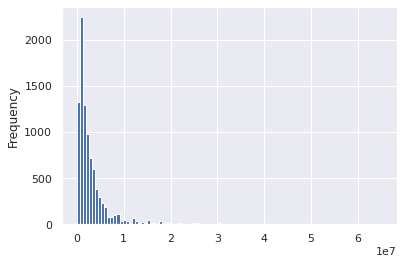

In [173]:
dados_vendas['Valor_anuncio_float'].plot.hist(bins = 100) 

In [174]:
pd.set_option("display.precision", 2)
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9153.00,9153.00,9153.00,9153.00,9153.00
mean,344.68,3.45,3.80,3.96,3051843.14
std,250.92,1.05,1.97,2.60,3944634.91
min,10.00,1.00,1.00,1.00,13000.00
25%,168.00,3.00,2.00,2.00,890000.00
50%,276.00,3.00,4.00,4.00,1800000.00
75%,450.00,4.00,5.00,5.00,3500000.00
max,2850.00,16.00,40.00,50.00,65000000.00


## Nesse ponto, estão sendo usadas duas bibliotecas em conjunto: Matplotlib e Seaborn. 

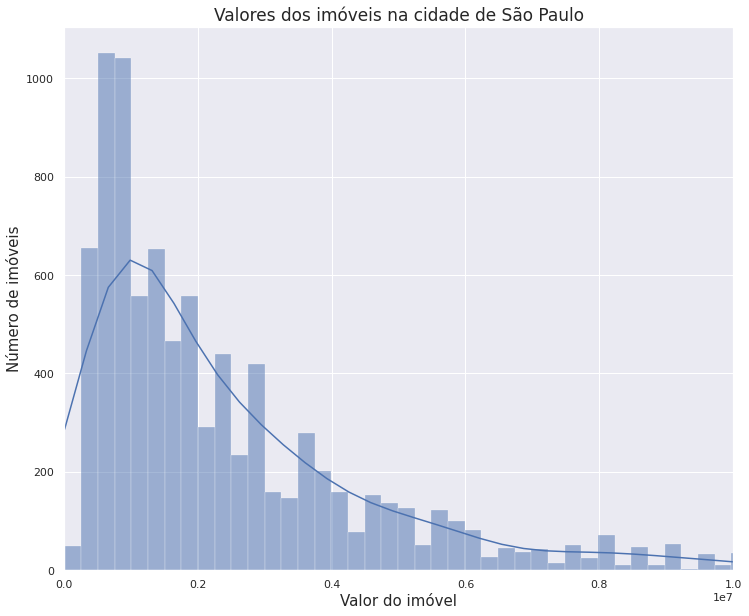

In [175]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set() #alias for set_theme() ... serve para ajustar a estética e pode conter parâmetros. 
plt.figure(figsize=(12,10))
ax = sns.histplot(data = dados_vendas, x = 'Valor_anuncio_float', palette= 'BuPu', kde = True) #kde faz uma curva de aproximação
# coloquei a linha acima numa variável pra fazer operações com ela separadamente 
ax.set_title('Valores dos imóveis na cidade de São Paulo', fontsize = 17)
ax.set_xlabel('Valor do imóvel', fontsize = 15) ##teste ok
ax.set_ylabel('Número de imóveis',fontsize = 15) 
plt.xlim(0,10000000) ##limitando no eixo x.
plt.show()


> # Criando uma representação para o valor médio dos imóveis por Bairro. Usamos o valor dos imóveis e a metragem.

In [176]:
dados_vendas['Valor_m2'] = dados_vendas['Valor_anuncio_float']/dados_vendas['Metragem'] 
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


> ### Média dos valores agrupados por Bairro. Valor do m² calculado por imóvel.


In [177]:
dados_vendas.groupby('Bairro').mean() # ao usar groupby, o parâmetro vira índice


,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,246.16,3.27,3.04,2.91,1763200.01,7656.17
Alto da Boa Vista,418.88,4.12,5.12,4.62,2391250.00,5849.57
Alto da Lapa,299.25,3.15,3.85,4.00,2083168.75,7606.73
Alto da Mooca,270.05,3.30,2.60,3.65,1184170.00,5691.74
Alto de Pinheiros,429.85,3.94,4.83,4.95,4782698.96,11269.98
...,...,...,...,...,...,...
Vila Água Funda,152.20,2.60,2.20,2.60,652000.00,4467.13
Água Branca,173.58,3.08,3.25,2.25,1226500.00,7269.11
Água Fria,165.42,2.83,3.42,2.50,927083.33,5841.10


In [178]:
dados_bairro = dados_vendas.groupby('Bairro').sum()
dados_bairro

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2
Bairro,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55
Alto da Lapa,23940,252,308,320,166653500.00,608538.25
Alto da Mooca,5401,66,52,73,23683400.00,113834.80
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61
...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64
Água Branca,2083,37,39,27,14718000.00,87229.37
Água Fria,1985,34,41,30,11125000.00,70093.25


 > ## Calculando o valor do m² por Bairro usando a soma total dos anúncios dividido pela soma das Metragens

In [179]:
dados_bairro['Valor_m2_bairro'] = dados_bairro["Valor_anuncio_float"]/dados_bairro['Metragem']
dados_bairro


,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
Bairro,,,,,,,
Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...
Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53


In [180]:
dados_bairro.reset_index(inplace = True)  #retornar os índices à forma (0,1,2,3...).
dados_bairro

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
0,Aclimação,19447,258,240,230,139292801.00,604837.39,7162.69
1,Alto da Boa Vista,3351,33,41,37,19130000.00,46796.55,5708.74
2,Alto da Lapa,23940,252,308,320,166653500.00,608538.25,6961.30
3,Alto da Mooca,5401,66,52,73,23683400.00,113834.80,4385.00
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
...,...,...,...,...,...,...,...,...
691,Vila Água Funda,761,13,11,13,3260000.00,22335.64,4283.84
692,Água Branca,2083,37,39,27,14718000.00,87229.37,7065.77
693,Água Fria,1985,34,41,30,11125000.00,70093.25,5604.53
694,Água Funda,278,6,5,4,1090000.00,7753.73,3920.86


> ## Selecionando os 10 bairros com mais imóveis

In [181]:
top_10 = dados_vendas['Bairro'].value_counts()[:10].index

In [182]:
dados_bairro.query("Bairro in @top_10")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,Valor_m2,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1764815915.00,4158622.61,11126.34
19,Brooklin Paulista,70002,778,862,832,475796789.00,1627341.87,6796.90
57,Cidade Jardim,132220,789,1008,1172,1164210900.00,1635692.98,8805.10
155,Jardim Europa,118898,795,993,1056,2414172900.00,4192164.45,20304.57
168,Jardim Guedala,222212,1438,2018,2155,1794165587.00,2833873.46,8074.12
187,Jardim Leonor,97141,697,941,902,646326369.00,1115858.80,6653.49
227,Jardim Paulista,130283,1028,1231,1171,2136081000.00,4279262.19,16395.70
338,Pacaembu,100285,774,889,1028,867956500.00,1753672.28,8654.90
396,Planalto Paulista,59250,636,768,713,374907000.00,1186380.95,6327.54
563,Vila Madalena,66250,739,786,712,583253030.00,1792770.40,8803.82


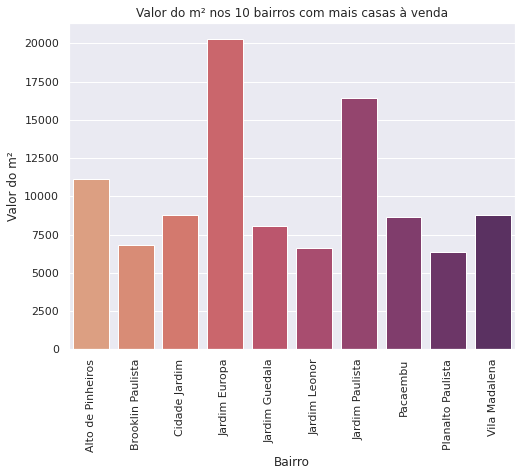

In [183]:
plt.figure(figsize=(8,6))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data = dados_bairro.query("Bairro in @top_10"), palette= "flare")
ax.set_title('Valor do m² nos 10 bairros com mais casas à venda')
ax.set_xlabel('Bairro')
ax.set_ylabel('Valor do m²')
ax.tick_params(axis = 'x', rotation = 90)
plt.show()

> ## Visualizando a distribuição de valores para os 10 bairros com mais casas à venda

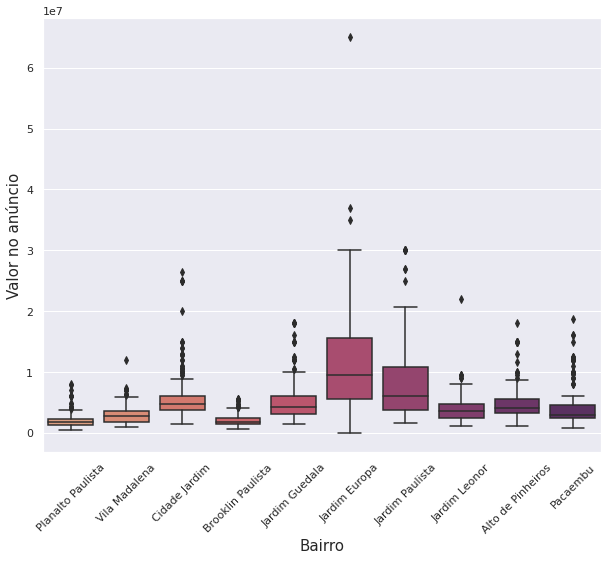

In [184]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x = 'Bairro', y= 'Valor_anuncio_float', data = dados_vendas.query('Bairro in @top_10'), palette = 'flare')
ax.set_ylabel('Valor no anúncio', fontsize = 15)
ax.set_xlabel('Bairro', fontsize = 15)

ax.tick_params(axis = 'x', rotation = 45)

>> ## Visualizando a distribuição de Metragens para os 10 bairros com mais casas à venda

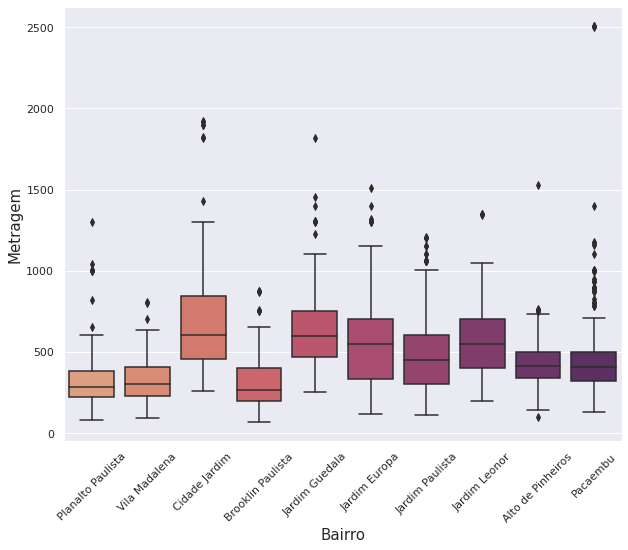

In [185]:
plt.figure(figsize=(10,8))
ax = sns.boxplot(x = 'Bairro', y= 'Metragem', data = dados_vendas.query('Bairro in @top_10 & Metragem < 20000'), palette = 'flare')
ax.set_xlabel('Bairro', fontsize = 15)
ax.set_ylabel('Metragem', fontsize = 15)
ax.tick_params(axis = 'x', rotation = 45)

# Nova base de dados: dados do IBGE.
# Faremos um cruzamento de dados para obter informações de ordem social a partir dos setores censitários definidos do IBGE pelo senso mais recente (2010), de forma a encontrar relações entre a renda e o valor dos imóveis por região.

In [186]:
ibge = 'https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv'
ibge_sp = pd.read_csv(ibge, sep = ';',  encoding='UTF-8', thousands='.', decimal=',')


In [187]:
ibge_sp.dropna(how = 'all', axis = 1, inplace = True) # havia uma coluna vazia. 

> ## Visualizando os dados

In [188]:
ibge_sp.sample(3)

,Cod_setor,Cod_Grandes Regi�es,Nome_Grande_Regiao,Cod_UF,Nome_da_UF,Cod_meso,Nome_da_meso,Cod_micro,Nome_da_micro,Cod_RM,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
6681,355030836000062,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.40,2.54,1114.10,781997.65,1170.51,755225.38,703.53,928313.66,1059.58,1021432.40
15991,355030883000139,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,2.51,1.11,6172.58,15922448.97,6404.05,15031616.85,3894.98,15345868.27,4982.89,14207273.71
18247,355030896000131,3,Regi�o Sudeste,35,S�o Paulo,3515,Metropolitana de S�o Paulo,35061,S�o Paulo,20,...,3.58,2.69,770.34,788307.75,1089.37,767019.75,460.32,489114.80,945.71,546111.98


In [189]:
ibge_sp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

In [190]:
ibge_sp['Nome_do_distrito'].unique()

array(['�GUA RASA', 'ALTO DE PINHEIROS', 'ANHANGUERA', 'ARICANDUVA',
       'ARTUR ALVIM', 'BARRA FUNDA', 'BELA VISTA', 'BEL�M', 'BOM RETIRO',
       'BR�S', 'BRASIL�NDIA', 'BUTANT�', 'CACHOEIRINHA', 'CAMBUCI',
       'CAMPO BELO', 'CAMPO GRANDE', 'CAMPO LIMPO', 'CANGAIBA',
       'CAP�O REDONDO', 'CARR�O', 'CASA VERDE', 'CIDADE ADEMAR',
       'CIDADE DUTRA', 'CIDADE LIDER', 'CIDADE TIRADENTES', 'CONSOLA��O',
       'CURSINO', 'ERMELINO MATARAZZO', 'FREGUESIA DO �', 'GRAJA�',
       'GUAIANASES', 'MOEMA', 'IGUATEMI', 'IPIRANGA', 'ITAIM BIBI',
       'ITAIM PAULISTA', 'ITAQUERA', 'JABAQUARA', 'JA�AN�', 'JAGUARA',
       'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA', 'JARDIM HELENA',
       'JARDIM PAULISTA', 'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LAPA',
       'LIBERDADE', 'LIM�O', 'MANDAQUI', 'MARSILAC', 'MOOCA', 'MORUMBI',
       'PARELHEIROS', 'PARI', 'PARQUE DO CARMO', 'PEDREIRA', 'PENHA',
       'PERDIZES', 'PERUS', 'PINHEIROS', 'PIRITUBA', 'PONTE RASA',
       'RAPOSO TAVARES', 'REP�BLICA

> ## Nova base de dados com endereços a partir do CEP. 

In [191]:
enderecos = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Imersão Alura/enderecos.csv')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [192]:
enderecos.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
0,Rua,Armando Silveira,Rua Armando Silveira,NaN,Divisa,Santana do Livramento,RS,97573200.00,-30.88,-55.55
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
2,Rua,Prefeito Agenor Barcelos Feio,Rua Prefeito Agenor Barcelos Feio,NaN,Registro,Santana do Livramento,RS,97571090.00,-30.86,-55.56
3,Rua,Sebastião Gomes,Rua Sebastião Gomes - até 59/60,59,Registro,Santana do Livramento,RS,97571374.00,-30.86,-55.55
4,Rua,Marquês do Alegrete,Rua Marquês do Alegrete,NaN,Parque das Águas,Santana do Livramento,RS,97571500.00,-30.86,-55.55


> ## Filtrando a cidade de SP

In [193]:
enderecos_sp = enderecos.query("sigla_uf == 'SP'") # queremos apenas os dados relacionados a SP
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35


In [194]:
# criar mais uma variável 
enderecos_sp['rua'] =  enderecos_sp['tipo_logr'] + " " + enderecos_sp['logr_nome']  
enderecos_sp['rua'] =  enderecos_sp['rua'].str.lower().str.strip() #lower deixa em caixa baixa e strip() remove espaços em branco 
# e tb remove caracteres que forem passados como parâmetro 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [195]:
enderecos_sp.head()

,tipo_logr,logr_nome,logr_compl,numero,bairro,nome_localidade,sigla_uf,cep,latitude,longitude,rua
1,Rua,João Antônio Vasconcelos,Rua João Antônio Vasconcelos - até 627/628,627,Amizade,Araçatuba,SP,16074320.00,-21.19,-50.45,rua joão antônio vasconcelos
413269,Rua,A,Rua A,NaN,Jardim Glória,Americana,SP,13468220.00,-22.76,-47.34,rua a
413270,Rua,A,Rua A,NaN,Jardim São Roque,Americana,SP,13469414.00,-22.74,-47.35,rua a
413271,Rua,A,Rua A,NaN,Iate Clube de Campinas,Americana,SP,13475620.00,-22.74,-47.33,rua a
413272,Rua,João Bandini,Rua João Bandini,NaN,Jardim Miriam,Americana,SP,13469072.00,-22.74,-47.35,rua joão bandini


## Na base de dados 'dados_vendas', o endereço "Rua" possui nome da rua e número. Será necessário deixar apenas o nome.

In [196]:
dados_vendas.head() 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00


In [197]:
dados_vendas["Rua"].str.extract(r'(^[\w ]+)')[:10] ## usamos REGEX 

,0
0,Avenida Itacira
1,Rua Aurelia Perez Alvarez
2,Rua Alba Valdez
3,NaN
4,Rua Tobias Barreto
5,Rua Graham Bell
6,Rua Francisco Paulo
7,Rua Guilherme Valente
8,Rua Sagrada Família
9,Rua Tapaji


In [198]:
dados_vendas["apenas_rua"] = dados_vendas["Rua"].str.extract(r'(^[\w ]+)') #adicionando a uma variável
dados_vendas["apenas_rua"] = dados_vendas["apenas_rua"].str.lower().str.strip() #configurando 
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto


# Unindo as duas bases de dados (imóveis e IBGE)

In [199]:
dados_geo = pd.merge(left = dados_vendas, right = enderecos_sp[['rua', 'cep', 'latitude', 'longitude']], 
                     how = 'left', left_on = 'apenas_rua', 
                     right_on = 'rua').drop_duplicates(subset=dados_vendas.columns).query("cep > 0")

                     ## aqui está removendo duplicados, a partir da tabela dados_vendas


dados_geo

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,Valor_m2,apenas_rua,rua,cep,latitude,longitude
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.00,7000.00,avenida itacira,avenida itacira,11443160.00,-23.98,-46.20
5,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.00,7459.68,rua aurelia perez alvarez,rua aurelia perez alvarez,4642020.00,-23.64,-46.69
6,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.00,3040.00,rua alba valdez,rua alba valdez,4845200.00,-23.75,-46.70
7,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.00,2209.68,NaN,NaN,18125000.00,-23.53,-47.26
26,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.00,5400.00,rua tobias barreto,rua tobias barreto,13474663.00,-22.70,-47.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89935,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.00,5617.98,avenida odila,avenida odila,4058020.00,-23.61,-46.65
89937,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.00,7000.00,rua tapuçu,rua tapuçu,4671185.00,-23.66,-46.69
89938,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.00,3801.65,rua guararema,rua guararema,13030640.00,-22.92,-47.08
89955,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.00,5121.95,rua estero belaco,rua estero belaco,4145020.00,-23.62,-46.63


# Vamos usar uma nova base de dados para conseguir associar latitude e longitude com o setor censitário.

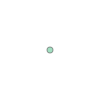

In [200]:
from shapely.geometry import Point
latitude = -23.56 	
longitude = -46.59
Point(longitude, latitude)

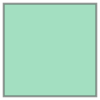

In [201]:
from shapely.geometry import Polygon
Polygon([[0, 0], [1, 0], [1, 1], [0, 1]])

In [202]:
Polygon([[0, 0], [1, 0], [1, 1], [0, 1]]).contains(Point(0.1,0.9)) # serve para analisar pontos dentro de polígonos.

True

> ## O setor censitário será tratado como um polígono e teremos que checar se contém um determinado ponto de latitude-longitude

>### Instalando o Geopandas

In [203]:
 !pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [204]:
import geopandas as gpd 

In [205]:
setor_censo = gpd.read_file("/content/drive/MyDrive/Colab Notebooks/Imersão Alura/35SEE250GC_SIR.shp")

# lendo o arquivo .shp

In [206]:
setor_censo.head()

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
0,98237.00,354100005000009,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,1,"POLYGON ((-46.41024 -24.01103, -46.41169 -24.0..."
1,98232.00,354100005000004,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,2,"POLYGON ((-46.41606 -24.00245, -46.41598 -24.0..."
2,98230.00,354100005000002,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,3,"POLYGON ((-46.41213 -24.00792, -46.41244 -24.0..."
3,98229.00,354100005000001,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,4,"POLYGON ((-46.41134 -24.00552, -46.41196 -24.0..."
4,98231.00,354100005000003,URBANO,35410000500,None,354100005,PRAIA GRANDE,3541000,PRAIA GRANDE,SANTOS,METROPOLITANA DE SÃO PAULO,354100005001,Boqueirão,5,"POLYGON ((-46.41326 -24.00514, -46.41484 -24.0..."


In [207]:
setor_censo_sp = setor_censo[setor_censo.NM_MUNICIP == "SÃO PAULO"] # aplicando um filtro para buscar apenas SP
setor_censo_sp[setor_censo_sp.contains(Point(-46.63, -23.58))] # teste

,ID,CD_GEOCODI,TIPO,CD_GEOCODS,NM_SUBDIST,CD_GEOCODD,NM_DISTRIT,CD_GEOCODM,NM_MUNICIP,NM_MICRO,NM_MESO,CD_GEOCODB,NM_BAIRRO,ID1,geometry
60986,126568.00,355030890000080,URBANO,35503089000,None,355030890,VILA MARIANA,3550308,SÃO PAULO,SÃO PAULO,METROPOLITANA DE SÃO PAULO,None,None,60987,"POLYGON ((-46.62618 -23.58169, -46.62863 -23.5..."


## Nesse ponto, uniremos as informaçoes de latitude e longitude em dados_geo, para testar se estão na coluna polígono em setor_censo_sp 

In [208]:
dados_geo["Point"] = "" # cria uma coluna vazia
for i in dados_geo.index: #faz a leitura e associação dos pontos da tabela dados_geo
    dados_geo["Point"][i] = Point(dados_geo["longitude"][i], dados_geo["latitude"][i])
     ## está colocando na forma (longitude, latitude). Com o uso do geopandas os valores são salvos como um objeto específico (Point)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [209]:
#dados_geo['setor_censo'] = dados_geo["Point"].map(
#  lambda x: setor_censo_sp.loc[setor_censo_sp.contains(x), 'CD_GEOCODI'].values).str[0]
#  nessa etapa estamos pegando os objetos da coluna 'CD_GEOCODI' (num. do setor censitário) que possuem lat. e long.
#  no dataset dados_geo
# vai demorar alguns minutos 

In [210]:
dados_geo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Imersão Alura/dados_geo.csv")
dados_geo 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Valor_anuncio,Tipo_anuncio,Valor_mm,Valor_m2,rua,cep,latitude,longitude,Point,setor_censo
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,7000000.00,NaN,7.00,7000.00,Avenida Itacira,4061000.00,-23.62,-46.65,POINT (-46.6481622 -23.6157934),355030877000067.00
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,3700000.00,NaN,3.70,7459.68,Rua Aurelia Perez Alvarez,4642020.00,-23.64,-46.69,POINT (-46.6883114 -23.6409612),355030871000023.00
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,380000.00,NaN,0.38,3040.00,Rua Alba Valdez,4845200.00,-23.75,-46.70,POINT (-46.6958895 -23.75299),355030830000050.00
3,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,540000.00,NaN,0.54,5400.00,Rua Tobias Barreto,3176000.00,-23.55,-46.59,POINT (-46.5881729 -23.5499597),355030808000050.00
4,Rua Graham Bell,Santo Amaro,São Paulo,440,4,4,6,R$ 1.980.000,1980000.00,NaN,1.98,4500.00,Rua Graham Bell,4737030.00,-23.59,-46.76,POINT (-46.7600773 -23.5937964),355030865000169.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,1500000.00,NaN,1.50,5617.98,Avenida Odila,4058020.00,-23.61,-46.65,POINT (-46.6472577 -23.6090928),355030877000099.00
5601,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,665000.00,NaN,0.67,7000.00,Rua Tapuçu,4671185.00,-23.66,-46.69,POINT (-46.6915206 -23.661018),355030816000087.00
5602,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,2300000.00,NaN,2.30,3801.65,Rua Guararema,4136030.00,-23.41,-46.04,POINT (-46.0373872 -23.411688),NaN
5603,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,1050000.00,NaN,1.05,5121.95,Rua Estero Belaco,4145020.00,-23.62,-46.63,POINT (-46.632983 -23.6161237),355030877000052.00


# Por último, uniremos a tabela dados_geo com a tabela do ibge, onde temos as informações sociais associadas a cada setor censitário. 

In [211]:
dados_vendas_censo = pd.merge(left = dados_geo, right = ibge_sp, how = "left", left_on = "setor_censo", right_on = "Cod_setor")
dados_vendas_censo.columns

Index(['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor', 'Valor_anuncio', 'Tipo_anuncio', 'Valor_mm', 'Valor_m2', 'rua',
       'cep', 'latitude', 'longitude', 'Point', 'setor_censo', 'Cod_setor',
       'Cod_Grandes Regi�es', 'Nome_Grande_Regiao', 'Cod_UF', 'Nome_da_UF ',
       'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro', 'Cod_RM',
       'Nome_da_RM', 'Cod_municipio', 'Nome_do_municipio', 'Cod_distrito',
       'Nome_do_distrito', 'Cod_subdistrito', 'Nome_do_subdistrito',
       'Cod_bairro', 'Nome_do_bairro', 'Situacao_setor', 'Tipo_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012'],
      dtype='object')

In [212]:
dados_vendas_censo.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  5605 non-null   object 
 1   Bairro               5597 non-null   object 
 2   Cidade               5605 non-null   object 
 3   Metragem             5605 non-null   int64  
 4   Quartos              5605 non-null   int64  
 5   Banheiros            5605 non-null   int64  
 6   Vagas                5605 non-null   int64  
 7   Valor                5605 non-null   object 
 8   Valor_anuncio        5605 non-null   float64
 9   Tipo_anuncio         0 non-null      float64
 10  Valor_mm             5605 non-null   float64
 11  Valor_m2             5605 non-null   float64
 12  rua                  5605 non-null   object 
 13  cep                  5605 non-null   float64
 14  latitude             5605 non-null   float64
 15  longitude            5605 non-null   f

# Base de dados pronta

 A partir de agora, vamos analisar as variáveis relacionadas às informações sociais fornecidas pelos dados do IBGE, relacionando com os preços dos imóveis nos bairros da cidade de São Paulo. 

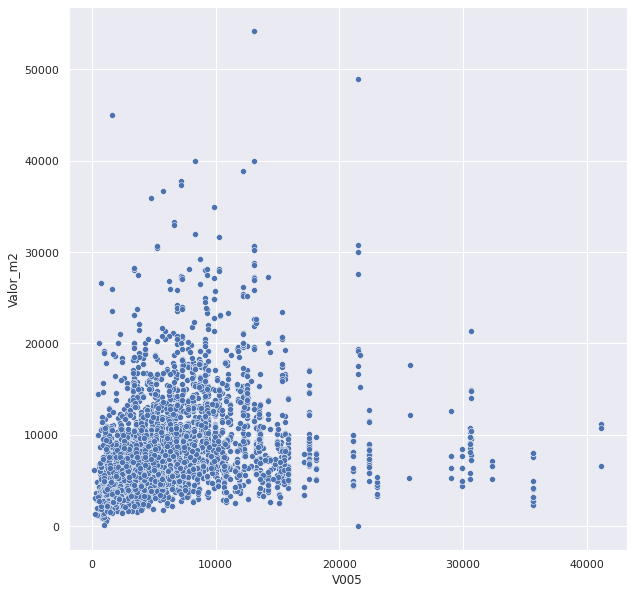

In [213]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_vendas_censo, x="V005", y="Valor_m2")

 > ## Aplicação de Machine Learning

In [214]:
dados_vendas_censo.info() # vamos selecionar algumas variáveis. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5605 entries, 0 to 5604
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  5605 non-null   object 
 1   Bairro               5597 non-null   object 
 2   Cidade               5605 non-null   object 
 3   Metragem             5605 non-null   int64  
 4   Quartos              5605 non-null   int64  
 5   Banheiros            5605 non-null   int64  
 6   Vagas                5605 non-null   int64  
 7   Valor                5605 non-null   object 
 8   Valor_anuncio        5605 non-null   float64
 9   Tipo_anuncio         0 non-null      float64
 10  Valor_mm             5605 non-null   float64
 11  Valor_m2             5605 non-null   float64
 12  rua                  5605 non-null   object 
 13  cep                  5605 non-null   float64
 14  latitude             5605 non-null   float64
 15  longitude            5605 non-null   f

In [215]:
dados_vendas_censo = dados_vendas_censo[['Rua', 'Bairro', 'Cidade', 'Metragem', 'Quartos', 'Banheiros', 'Vagas',
       'Valor_anuncio', 'Valor_mm', 'Valor_m2', 'latitude', 'longitude', 'Situacao_setor', 'V001',
       'V002', 'V003', 'V004', 'V005', 'V006', 'V007', 'V008', 'V009', 'V010',
       'V011', 'V012']].dropna()
dados_vendas_censo.head(3) ## selecionamos 25 colunas. 

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,7000000.00,7.00,7000.00,...,2.66,2.04,3158.96,22210644.93,5570.65,25770816.97,2096.19,13029851.56,3930.35,17241576.74
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,3700000.00,3.70,7459.68,...,3.13,1.96,7600.44,36778930.17,7890.53,35886906.64,4149.00,26760682.90,6063.92,27502674.90
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,380000.00,0.38,3040.00,...,3.47,3.06,805.13,769188.78,1011.75,757433.42,518.77,426672.78,858.51,414378.88


> ## Plotando um boxplot para vermos a distribuição de valor_anuncio

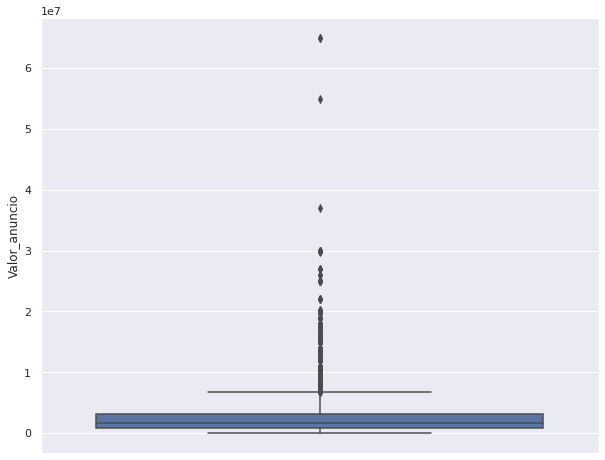

In [216]:
plt.figure(figsize=(10, 8)) 
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio")
plt.show()

In [217]:
dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000") # buscando outliers

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
54,Rua Inglaterra,Jardim Europa,São Paulo,200,3,3,2,13000.00,0.01,65.00,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
89,Rua Inglaterra,Jardim Europa,São Paulo,756,5,4,10,37000000.00,37.00,48941.80,...,3.13,2.87,21545.71,1577883376.43,26081.65,1794039881.36,11050.67,882338714.47,15470.93,1168079134.43
1032,Praça Nicolau Scarpa,Jardim América,São Paulo,1200,4,4,25,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3521,Rua Estados Unidos,Jardim América,São Paulo,1816,4,10,20,55000000.00,55.00,30286.34,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57
3896,Rua Estados Unidos,Jardim América,São Paulo,1200,4,6,24,65000000.00,65.00,54166.67,...,3.57,3.01,13131.61,508165993.72,14507.30,541764826.89,7934.91,364776324.15,10168.24,445001716.57


### A remoção de alguns outliers não melhora muito a visualização


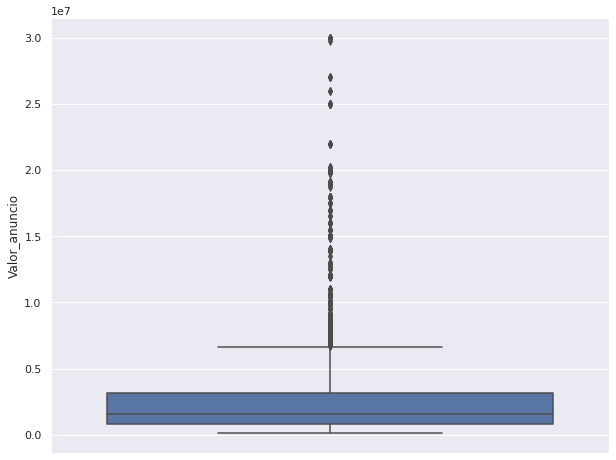

In [218]:
dados_vendas_censo.drop(dados_vendas_censo.query("Valor_anuncio > 30000000 | Valor_anuncio < 100000").index, inplace = True)
plt.figure(figsize=(10, 8))  
ax = sns.boxplot(data = dados_vendas_censo, y="Valor_anuncio") 
plt.show()

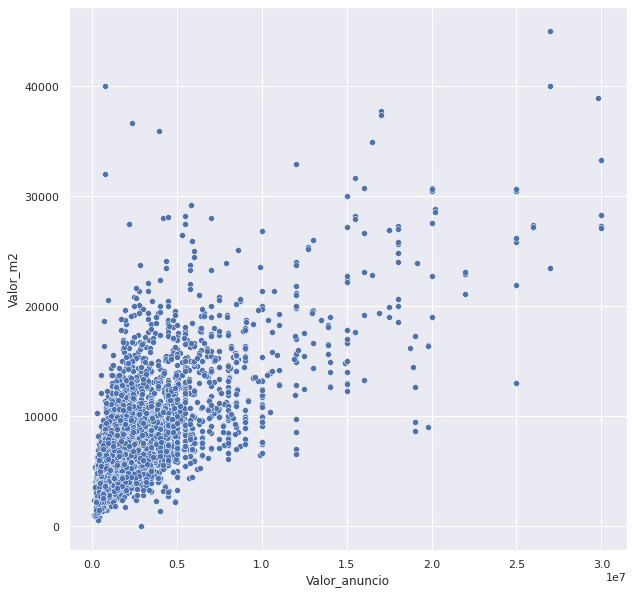

In [219]:
plt.figure(figsize=(10, 10)) ## relação entre valor_anuncio e o m²
sns.scatterplot(data = dados_vendas_censo, x="Valor_anuncio", y="Valor_m2")

In [220]:
dados_vendas_censo.corr()  ## .corr() é uma função do pandas que mostra a correlação entre as variáveis. corr = [-1,1]

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio,Valor_mm,Valor_m2,latitude,longitude,Situacao_setor,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
Metragem,1.00,0.23,0.23,0.27,0.30,0.30,0.06,-0.09,-0.13,0.48,...,0.13,0.05,0.22,0.07,0.23,0.05,0.20,0.07,0.21,0.05
Quartos,0.23,1.00,0.55,0.42,0.37,0.37,0.12,-0.01,-0.19,-0.01,...,0.16,0.07,0.32,0.12,0.33,0.11,0.31,0.13,0.32,0.11
Banheiros,0.23,0.55,1.00,0.46,0.47,0.47,0.22,-0.03,-0.25,-0.03,...,0.21,0.07,0.41,0.11,0.41,0.08,0.39,0.11,0.40,0.08
Vagas,0.27,0.42,0.46,1.00,0.48,0.48,0.15,-0.04,-0.19,-0.01,...,0.24,0.09,0.34,0.11,0.34,0.08,0.32,0.12,0.33,0.09
Valor_anuncio,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_mm,0.30,0.37,0.47,0.48,1.00,1.00,0.70,0.02,-0.21,-0.00,...,0.13,0.08,0.45,0.11,0.45,0.07,0.47,0.13,0.45,0.08
Valor_m2,0.06,0.12,0.22,0.15,0.70,0.70,1.00,0.05,-0.18,-0.03,...,-0.13,0.01,0.29,0.04,0.28,0.02,0.37,0.05,0.32,0.02
latitude,-0.09,-0.01,-0.03,-0.04,0.02,0.02,0.05,1.00,0.15,-0.03,...,-0.05,0.03,-0.05,-0.09,-0.07,-0.07,-0.04,-0.07,-0.07,-0.06
longitude,-0.13,-0.19,-0.25,-0.19,-0.21,-0.21,-0.18,0.15,1.00,-0.01,...,-0.05,0.02,-0.36,-0.10,-0.36,-0.07,-0.38,-0.10,-0.37,-0.07
Situacao_setor,0.48,-0.01,-0.03,-0.01,-0.00,-0.00,-0.03,-0.03,-0.01,1.00,...,0.03,0.00,-0.03,-0.01,-0.03,-0.01,-0.04,-0.01,-0.03,-0.00


> ## Visualizando a correlação entre as variáveis

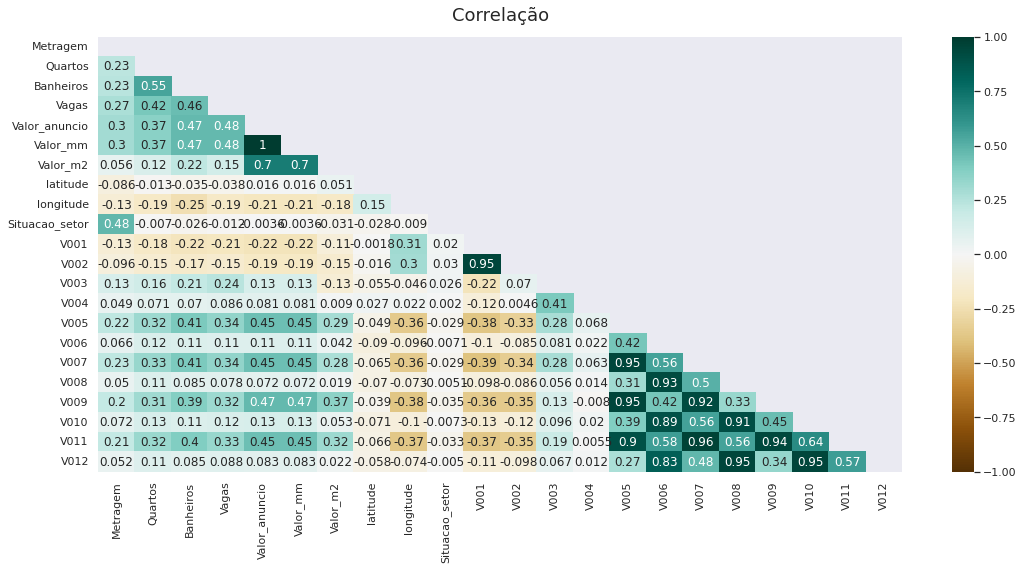

In [221]:
import numpy as np
plt.figure(figsize=(18, 8))
#https://www.tylervigen.com/spurious-correlations
mask = np.triu(np.ones_like(dados_vendas_censo.corr(), dtype=bool))
heatmap = sns.heatmap(dados_vendas_censo.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlação', fontdict={'fontsize':18}, pad=16);

> ## Treinando um modelo de Regressão Linear

In [278]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = dados_vendas_censo[["Metragem"]]
Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

> ## Usando apenas uma variável ('Metragem') para treinar o modelo. 

In [279]:
X = dados_vendas_censo[["Metragem"]] ## dois colchetes, passando como dimensão de dataframe
Y = dados_vendas_censo["Valor_anuncio"] # passando como Series.

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)
lr = LinearRegression()

In [254]:
X_train

,Metragem
3522,105
881,240
769,324
3364,484
4674,103
...,...
3558,397
3994,224
5432,238
4044,300


In [255]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

In [280]:
lr.fit(X_train, Y_train) ## fitando o modelo 

LinearRegression()

In [281]:
Y_predict_test = lr.predict(X_test) # treinando 
Y_predict_test ## valores preditos pelo modelo 
len(Y_predict_test)

1326

In [277]:
 # valores reais. Iremos comparar as variáveis Y_test e Y_predict_test

In [284]:
Y_test.values

array([4500000.,  345000.,  800000., ..., 2200000., 1500000., 2800000.])

In [293]:
Y_predict_test_series = pd.Series(Y_predict_test)
Y_predict_test_series.values

array([4535135.54576314, 2319529.74583429, 2424501.59358835, ...,
       2802400.24550293, 2483285.82833061, 2854186.3570616 ])

In [294]:
data = {'Y_test': Y_test.values,
        'Y_predict_test_series': Y_predict_test_series.values}


In [296]:
data = pd.DataFrame(data)

> ## Comparando o resultado real (Y_test) com o valor predito pelo modelo (Y_predict_test_series).
> ## Mais acertos para uma faixa de valores menor.

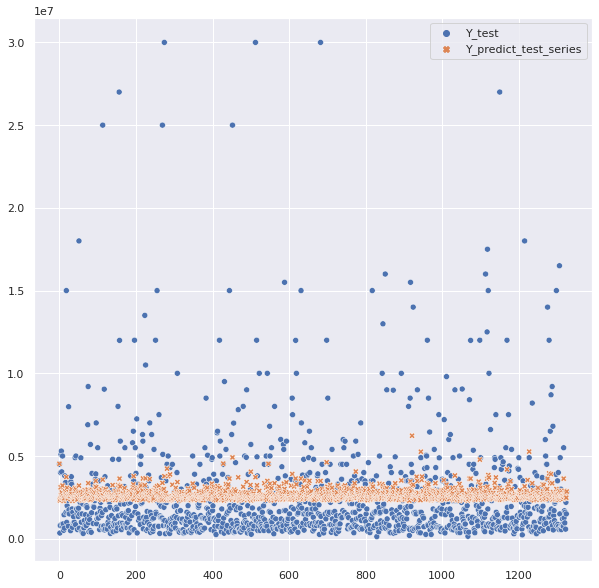

In [297]:
plt.figure(figsize=(10, 10)) 
sns.scatterplot(data = data)

In [298]:
Y_predict_train = lr.predict(X_train) #  fazendo no conjunto de teste para comparar
Y_predict_train

array([2382512.85448673, 2571462.18044402, 2689030.64992855, ...,
       2568662.93117058, 2655439.65864726, 2495882.4500611 ])

In [299]:
Y_train

3522    692000.00
881    1490000.00
769    2100000.00
3364   6700000.00
4674    622500.00
          ...    
3558   4280000.00
3994   1500000.00
5432   2300000.00
4044   1600000.00
948    3280000.00
Name: Valor_anuncio, Length: 3977, dtype: float64

# Comparação e teste de acertos do modelo criado utilizando as métricas Mean_Absolute_Error e R2_Score

In [300]:
from sklearn.metrics import mean_absolute_error, r2_score


In [301]:
mean_absolute_error(Y_test, Y_predict_test) # erro no conjunto de teste

1770626.9062636306

> ## Apenas a variável Metragem é insuficiente para uma boa precisão no modelo. Vamos utilizar novas variáveis. 

In [303]:
X = dados_vendas_censo[['Metragem', 'Quartos', 'Banheiros', 'Vagas','V001','V007', 'V009']]

Y = dados_vendas_censo["Valor_anuncio"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 54)

lr = LinearRegression()


In [304]:
lr.fit(X_train, Y_train)


LinearRegression()

In [305]:
Y_predict_test = lr.predict(X_test)
Y_predict_train = lr.predict(X_train)

In [306]:
mae_test = mean_absolute_error(Y_test, Y_predict_test)
r2_test = r2_score(Y_test, Y_predict_test)

mae_train = mean_absolute_error(Y_train, Y_predict_train)
r2_train = r2_score(Y_train, Y_predict_train)

In [307]:
mae_test

1349590.384432537

In [308]:
r2_test

0.37745069254620534

In [309]:
mae_train

1362945.691504754

In [310]:
r2_train

0.39899592785823335

>> # Não houve melhora significativa com o acréscimo de mais variáveis. O modelo mostra-se útil para imóveis com valor abaixo de um determinado limite.